In [2]:
#libs
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image
from datetime import datetime

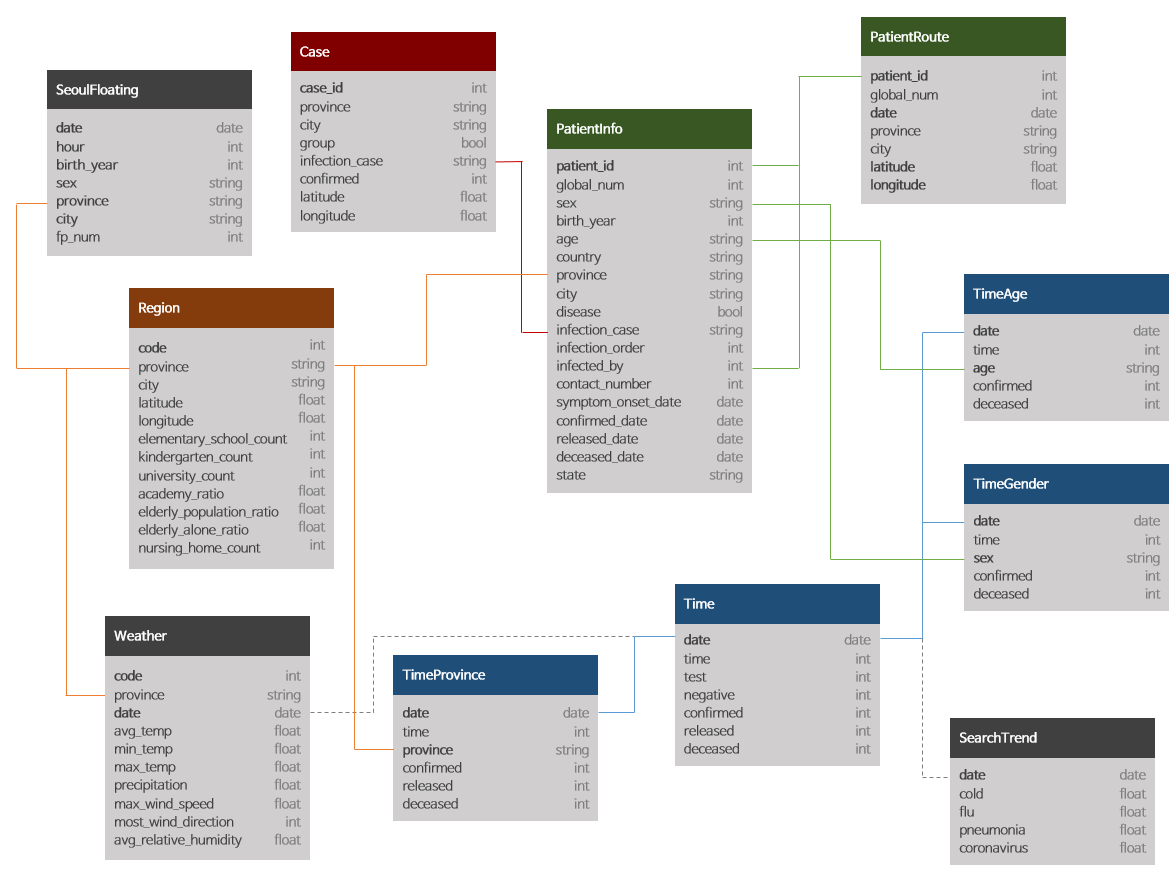

In [3]:
Image(filename="kcdcData/map.png")

In [4]:
df = pd.read_csv('kcdcData/PatientInfo.csv')
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [5]:
# convert the dates to datetime objects
date_format_str = '%Y-%m-%d'
df['confirmed_date'] = pd.to_datetime(df['confirmed_date'], format=date_format_str)
df['released_date'] = pd.to_datetime(df['released_date'], format=date_format_str)
df['symptom_onset_date'] = pd.to_datetime(df['symptom_onset_date'], format=date_format_str)
df['deceased_date'] = pd.to_datetime(df['symptom_onset_date'], format=date_format_str)
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,2020-01-22,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaT,2020-01-30,2020-03-02,NaT,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaT,2020-01-30,2020-02-19,NaT,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,2020-01-26,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaT,2020-01-31,2020-02-24,NaT,released


In [6]:
# get a col that's a timedelta from confirmed_date to released_date
df['confirmed_released_delta'] = df['released_date'] - df['confirmed_date']
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,confirmed_released_delta
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,2020-01-22,released,13 days
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaT,2020-01-30,2020-03-02,NaT,released,32 days
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaT,2020-01-30,2020-02-19,NaT,released,20 days
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,2020-01-26,released,16 days
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaT,2020-01-31,2020-02-24,NaT,released,24 days


In [7]:
# can't correlate with a datetime or timedelta, gotta do some transformations
df['confirmed_released_days'] = df['confirmed_released_delta'].dt.days
display(df)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,confirmed_released_delta,confirmed_released_days
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,2020-01-22,released,13 days,13.0
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaT,2020-01-30,2020-03-02,NaT,released,32 days,32.0
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaT,2020-01-30,2020-02-19,NaT,released,20 days,20.0
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,2020-01-26,released,16 days,16.0
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaT,2020-01-31,2020-02-24,NaT,released,24 days,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,7000000005,9120.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,20.0,NaT,2020-03-24,NaT,NaT,isolated,NaT,NaN
2767,7000000006,9087.0,male,NaN,30s,United States,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,23.0,NaT,2020-03-24,NaT,NaT,isolated,NaT,NaN
2768,7000000007,NaN,female,1996.0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,26.0,NaT,2020-03-25,NaT,NaT,isolated,NaT,NaN
2769,7000000008,NaN,female,NaN,10s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,25.0,NaT,2020-03-27,NaT,NaT,isolated,NaT,NaN


In [8]:
# if we want to consider sex, that's gotta be not a string...
df.sex = df.apply(lambda row: 1 if row.sex == 'male' else 0, axis=1)

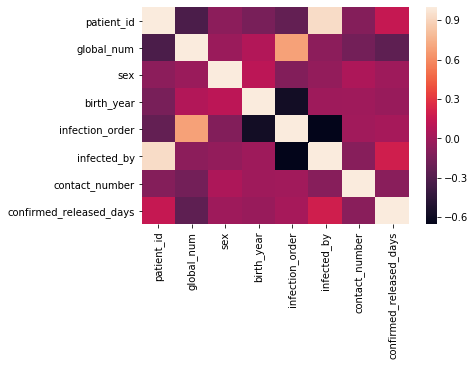

In [9]:
sns.heatmap(df.corr())

In [10]:
# let's add some province dummies
df = pd.get_dummies(df, columns=['province'], prefix='province')
display(df)

,patient_id,global_num,sex,birth_year,age,country,city,disease,infection_case,infection_order,...,province_Gyeonggi-do,province_Gyeongsangbuk-do,province_Gyeongsangnam-do,province_Incheon,province_Jeju-do,province_Jeollabuk-do,province_Jeollanam-do,province_Sejong,province_Seoul,province_Ulsan
0,1000000001,2.0,1,1964.0,50s,Korea,Gangseo-gu,NaN,overseas inflow,1.0,...,0,0,0,0,0,0,0,0,1,0
1,1000000002,5.0,1,1987.0,30s,Korea,Jungnang-gu,NaN,overseas inflow,1.0,...,0,0,0,0,0,0,0,0,1,0
2,1000000003,6.0,1,1964.0,50s,Korea,Jongno-gu,NaN,contact with patient,2.0,...,0,0,0,0,0,0,0,0,1,0
3,1000000004,7.0,1,1991.0,20s,Korea,Mapo-gu,NaN,overseas inflow,1.0,...,0,0,0,0,0,0,0,0,1,0
4,1000000005,9.0,0,1992.0,20s,Korea,Seongbuk-gu,NaN,contact with patient,2.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,7000000005,9120.0,0,NaN,20s,Korea,Jeju-do,NaN,overseas inflow,NaN,...,0,0,0,0,1,0,0,0,0,0
2767,7000000006,9087.0,1,NaN,30s,United States,Jeju-do,NaN,overseas inflow,NaN,...,0,0,0,0,1,0,0,0,0,0
2768,7000000007,NaN,0,1996.0,20s,Korea,Jeju-do,NaN,overseas inflow,NaN,...,0,0,0,0,1,0,0,0,0,0
2769,7000000008,NaN,0,NaN,10s,Korea,Jeju-do,NaN,overseas inflow,NaN,...,0,0,0,0,1,0,0,0,0,0


In [11]:
# let's also add some infection_case dummies
df = pd.get_dummies(df, columns=['infection_case'], prefix='cause')
display(df)

,patient_id,global_num,sex,birth_year,age,country,city,disease,infection_order,infected_by,...,cause_Pilgrimage to Israel,cause_River of Grace Community Church,cause_Seongdong-gu APT,cause_Shincheonji Church,cause_Suyeong-gu Kindergarten,cause_contact with patient,cause_etc,cause_gym facility in Cheonan,cause_gym facility in Sejong,cause_overseas inflow
0,1000000001,2.0,1,1964.0,50s,Korea,Gangseo-gu,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,1
1,1000000002,5.0,1,1987.0,30s,Korea,Jungnang-gu,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,1
2,1000000003,6.0,1,1964.0,50s,Korea,Jongno-gu,NaN,2.0,2.002000e+09,...,0,0,0,0,0,1,0,0,0,0
3,1000000004,7.0,1,1991.0,20s,Korea,Mapo-gu,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,1
4,1000000005,9.0,0,1992.0,20s,Korea,Seongbuk-gu,NaN,2.0,1.000000e+09,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,7000000005,9120.0,0,NaN,20s,Korea,Jeju-do,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2767,7000000006,9087.0,1,NaN,30s,United States,Jeju-do,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2768,7000000007,NaN,0,1996.0,20s,Korea,Jeju-do,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2769,7000000008,NaN,0,NaN,10s,Korea,Jeju-do,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [12]:
# also, it seems that everyone gets an "age" but not everyone gets a birth year, so...
import re
def f(row):
    if row.age.isdigit():
        return row.age
    if re.match(r'[0-9]+', row.age):
        return re.findall(r'[0-9]+', row.age)[0]
df.age = df.age.astype(str)
df.age = df.apply(lambda row: f(row), axis=1)
df = df[df.age != None]
display(df)

,patient_id,global_num,sex,birth_year,age,country,city,disease,infection_order,infected_by,...,cause_Pilgrimage to Israel,cause_River of Grace Community Church,cause_Seongdong-gu APT,cause_Shincheonji Church,cause_Suyeong-gu Kindergarten,cause_contact with patient,cause_etc,cause_gym facility in Cheonan,cause_gym facility in Sejong,cause_overseas inflow
0,1000000001,2.0,1,1964.0,50,Korea,Gangseo-gu,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,1
1,1000000002,5.0,1,1987.0,30,Korea,Jungnang-gu,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,1
2,1000000003,6.0,1,1964.0,50,Korea,Jongno-gu,NaN,2.0,2.002000e+09,...,0,0,0,0,0,1,0,0,0,0
3,1000000004,7.0,1,1991.0,20,Korea,Mapo-gu,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,1
4,1000000005,9.0,0,1992.0,20,Korea,Seongbuk-gu,NaN,2.0,1.000000e+09,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,7000000005,9120.0,0,NaN,20,Korea,Jeju-do,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2767,7000000006,9087.0,1,NaN,30,United States,Jeju-do,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2768,7000000007,NaN,0,1996.0,20,Korea,Jeju-do,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2769,7000000008,NaN,0,NaN,10,Korea,Jeju-do,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# drop any without confirmed released days
df = df[pd.notna(df.confirmed_released_days)]
df = df[pd.notna(df.age)]
display(df)

,patient_id,global_num,sex,birth_year,age,country,city,disease,infection_order,infected_by,...,cause_Pilgrimage to Israel,cause_River of Grace Community Church,cause_Seongdong-gu APT,cause_Shincheonji Church,cause_Suyeong-gu Kindergarten,cause_contact with patient,cause_etc,cause_gym facility in Cheonan,cause_gym facility in Sejong,cause_overseas inflow
0,1000000001,2.0,1,1964.0,50,Korea,Gangseo-gu,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,1
1,1000000002,5.0,1,1987.0,30,Korea,Jungnang-gu,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,1
2,1000000003,6.0,1,1964.0,50,Korea,Jongno-gu,NaN,2.0,2.002000e+09,...,0,0,0,0,0,1,0,0,0,0
3,1000000004,7.0,1,1991.0,20,Korea,Mapo-gu,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,1
4,1000000005,9.0,0,1992.0,20,Korea,Seongbuk-gu,NaN,2.0,1.000000e+09,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,6100000084,NaN,1,1971.0,40,Korea,Geoje-si,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2762,7000000001,139.0,1,1998.0,20,Korea,Jeju-do,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2763,7000000002,222.0,0,1998.0,20,Korea,Jeju-do,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2764,7000000003,4345.0,0,1972.0,40,Korea,etc,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [14]:
# I'm putting the imports for all the actual classifying here
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [15]:
# don't need patient id or global num, as those are identifiers for individual cases
# may use only province or only city
# you know, I realize now that this isn't actually a particularly good dataset for what I want to figure out
# need symptoms and crap, not just age and area
X = df
X = X.drop(columns=[
    'patient_id', 
    'global_num', 
    'birth_year', 
    'country', 
    'city', 
    'infection_order', 
    'infected_by', 
    'disease',
    'contact_number',
    'symptom_onset_date',
    'confirmed_date',
    'released_date',
    'deceased_date',
    'confirmed_released_delta',
    'state'
])
y = df[['confirmed_released_days']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier(max_depth=2)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

p, r, f, s = precision_recall_fscore_support(y_test.values, y_predict)
print('accuracy: {}', accuracy_score(y_test.values, y_predict))
print('precision: {}', p)
print('recall: {}', r)
print('f-score: {}', f)

accuracy: {} 0.056338028169014086
precision: {} [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.04       0.1        0.         0.
 0.         0.         0.         0.1        0.03030303 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
recall: {} [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.36363636 0.17647059 0.         0.
 0.         0.         0.         0.33333333 0.08333333 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
f-score: {} [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.07207207 0.12765957 0.         0.
 0.         0.         0.         0.15384615 0.04444444 0.
 0.         0.         0.        

/home/suzie/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/suzie/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/suzie/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


So, here's a quick summary of this work that you can expand in the paper:

I (Suzie) really wanted to build a predictor of how long an individual was likely to stay in the hospital if they did get COVID-19. Upon further investigation of the dataset, however, I figured out that this isn't the best dataset for it. It does have individual case data, but most of the data is larger demographics, rather than things that apply to cases. This sort of data could be used if it covered a wider area, but as it does not, I realized that this likely wasn't going to work out well.

I threw this random forest together pretty quickly, since an ensemble of decision trees is more generalizable and generally performs better than a single decision tree, and decision trees work well for multi-class problems. Plus, I just really like random forests.

Initial performace is, as expected, piss-poor. I'm thinking I could improve things considerable by binning, but even then, I doubt I'll come up with anything useful. I'll comment on additional code as I write it.

In [23]:
# let's try that binning
# example from the interwebs
# df_ages['age_bins'] = pd.cut(x=df_ages['age'], bins=[20, 29, 39, 49])
# max age is 90, min age is 0
df['age'] = df[['age']].apply(pd.to_numeric)
df['age_bins'] = pd.cut(x=df['age'], bins=list(range(0, 90, 10))).cat.codes
display(df)

,patient_id,global_num,sex,birth_year,age,country,city,disease,infection_order,infected_by,...,cause_River of Grace Community Church,cause_Seongdong-gu APT,cause_Shincheonji Church,cause_Suyeong-gu Kindergarten,cause_contact with patient,cause_etc,cause_gym facility in Cheonan,cause_gym facility in Sejong,cause_overseas inflow,age_bins
0,1000000001,2.0,1,1964.0,50,Korea,Gangseo-gu,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,1,4
1,1000000002,5.0,1,1987.0,30,Korea,Jungnang-gu,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,1,2
2,1000000003,6.0,1,1964.0,50,Korea,Jongno-gu,NaN,2.0,2.002000e+09,...,0,0,0,0,1,0,0,0,0,4
3,1000000004,7.0,1,1991.0,20,Korea,Mapo-gu,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,1,1
4,1000000005,9.0,0,1992.0,20,Korea,Seongbuk-gu,NaN,2.0,1.000000e+09,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,6100000084,NaN,1,1971.0,40,Korea,Geoje-si,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,3
2762,7000000001,139.0,1,1998.0,20,Korea,Jeju-do,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
2763,7000000002,222.0,0,1998.0,20,Korea,Jeju-do,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
2764,7000000003,4345.0,0,1972.0,40,Korea,etc,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,3


In [27]:
# don't need patient id or global num, as those are identifiers for individual cases
# may use only province or only city
# you know, I realize now that this isn't actually a particularly good dataset for what I want to figure out
# need symptoms and crap, not just age and area
X = df
X = X.drop(columns=[
    'patient_id',
    'age',
    'global_num', 
    'birth_year', 
    'country', 
    'city', 
    'infection_order', 
    'infected_by', 
    'disease',
    'contact_number',
    'symptom_onset_date',
    'confirmed_date',
    'released_date',
    'deceased_date',
    'confirmed_released_delta',
    'state'
])
y = df[['confirmed_released_days']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier(max_depth=2)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

p, r, f, s = precision_recall_fscore_support(y_test.values, y_predict)
print('accuracy: {}', accuracy_score(y_test.values, y_predict))
print('precision: {}', p)
print('recall: {}', r)
print('f-score: {}', f)

accuracy: {} 0.19248826291079812
precision: {} [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.18518519 0.8125     0.         0.25       0.
 0.         0.         0.         0.09756098 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
recall: {} [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         1.         0.         0.5        0.
 0.         0.         0.         0.61538462 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
f-score: {} [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.3125     0.89655172 0.         0.33333333 0.
 0.         0.         0.         0.16842105 0.         0.
 0.         0.         0.         

/home/suzie/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/suzie/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/suzie/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
# that was some fun practice, now we bin the days
# min is -7, max is 37
# df['age'] = df[['age']].apply(pd.to_numeric)
df['duration_bins'] = pd.cut(x=df['confirmed_released_days'], bins=[-7,0,5,10,15,20,25,30,35]).cat.codes
display(df)

,patient_id,global_num,sex,birth_year,age,country,city,disease,infection_order,infected_by,...,cause_Seongdong-gu APT,cause_Shincheonji Church,cause_Suyeong-gu Kindergarten,cause_contact with patient,cause_etc,cause_gym facility in Cheonan,cause_gym facility in Sejong,cause_overseas inflow,age_bins,duration_bins
0,1000000001,2.0,1,1964.0,50,Korea,Gangseo-gu,NaN,1.0,NaN,...,0,0,0,0,0,0,0,1,4,3
1,1000000002,5.0,1,1987.0,30,Korea,Jungnang-gu,NaN,1.0,NaN,...,0,0,0,0,0,0,0,1,2,7
2,1000000003,6.0,1,1964.0,50,Korea,Jongno-gu,NaN,2.0,2.002000e+09,...,0,0,0,1,0,0,0,0,4,4
3,1000000004,7.0,1,1991.0,20,Korea,Mapo-gu,NaN,1.0,NaN,...,0,0,0,0,0,0,0,1,1,4
4,1000000005,9.0,0,1992.0,20,Korea,Seongbuk-gu,NaN,2.0,1.000000e+09,...,0,0,0,1,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,6100000084,NaN,1,1971.0,40,Korea,Geoje-si,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,3,1
2762,7000000001,139.0,1,1998.0,20,Korea,Jeju-do,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,1,7
2763,7000000002,222.0,0,1998.0,20,Korea,Jeju-do,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,1,3
2764,7000000003,4345.0,0,1972.0,40,Korea,etc,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,3,3


In [32]:
# don't need patient id or global num, as those are identifiers for individual cases
# may use only province or only city
# you know, I realize now that this isn't actually a particularly good dataset for what I want to figure out
# need symptoms and crap, not just age and area
X = df
X = X.drop(columns=[
    'patient_id',
    'age',
    'global_num', 
    'birth_year', 
    'country', 
    'city', 
    'infection_order', 
    'infected_by', 
    'disease',
    'contact_number',
    'symptom_onset_date',
    'confirmed_date',
    'released_date',
    'deceased_date',
    'confirmed_released_delta',
    'confirmed_released_days',
    'state'
])
y = df[['duration_bins']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier(max_depth=2)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

p, r, f, s = precision_recall_fscore_support(y_test.values, y_predict)
print('accuracy: {}', accuracy_score(y_test.values, y_predict))
print('precision: {}', p)
print('recall: {}', r)
print('f-score: {}', f)

accuracy: {} 0.6009389671361502
precision: {} [0.         0.         0.         0.41666667 0.55833333 0.6835443
 1.         0.        ]
recall: {} [0.         0.         0.         0.125      1.         1.
 0.07692308 0.        ]
f-score: {} [0.         0.         0.         0.19230769 0.71657754 0.81203008
 0.14285714 0.        ]


/home/suzie/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/suzie/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/suzie/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


First time I ran this, it put everything into one of the bins... That's pretty darn useless. Running it again, it doesn't ALWAYS do that, but it definitely isn't hitting everything, indicating that some classes are really underrepresented, mostly the first 3 and single last bin